In [1]:
from wand.image import Image as WImage

# Lab 2 Answers:

### Exercise 2:

The combiner here is exactly the same as the reducer. So combiner.py contains the following code:

In [ ]:
#!/usr/bin/env python
import sys

current_key = None
current_count = 0
word = None

# input comes from STDIN
for line in sys.stdin:
        # remove leading and trailing whitespace
        line = line.strip()

        # parse the input we got from mapper.py
        key, count = line.split('\t', 1)

        # convert count (currently a string) to int
        try:
                count = int(count)
        except ValueError:
                # count was not a number, so silently
                # ignore/discard this line
                continue

        # this IF-switch only works because Hadoop sorts map output
        # by key (here: word) before it is passed to the reducer
        if current_key == key:
                current_count += count
        else:
                if current_key:
                        # write result to STDOUT
                        print '%s\t%s' % (current_key, current_count)
                current_count = count
                current_key = key

# do not forget to output the last word if needed!
if current_key == key:
        print '%s\t%s' % (current_key, current_count)

Command to execute the Hadoop job (note: USER must be replaced with your username):

In [ ]:
hadoop jar $HADOOP_STR/hadoop-streaming-2.7.0-mapr-1808.jar \
-libjars $HADOOP_STR/hadoop-streaming-2.7.0-mapr-1808.jar \
-input textData/* \
-output w2e2-output \
-mapper "python mapper.py" \
-file /home/USER/bd-sp-2017/w2e2/mapper.py \
-reducer "python reducer.py" \
-file /home/USER/bd-sp-2017/w2e2/reducer.py \
-combiner combiner.py \
-file /home/USER/bd-sp-2017/w2e2/combiner.py

### Exercise 3:

The code for the mapper is included below:

In [ ]:
#!/usr/bin/env python
import sys
import os

# get input file name
input_name = os.environ['mapreduce_map_input_file']

# using name of input file figure out if airport is Heathrow or Wick
# store this information as a loc = H or loc = W
if 'heathrow' in input_name:
        loc = 'H'
else:
        loc = 'W'

# input comes from STDIN (standard input)
for line in sys.stdin:
        # remove leading and trailing whitespace
        line = line.strip()

        # if line contains 'yyyy' in it remove it (it is header line)
        if 'yyyy' in line:
                continue

        # split line into year, month, tmax, tmin and rain variables
        year, month, tmax, tmin, rain = line.split()

        # create key to be 'year-month-loc'
        key = '%s-%s-%s' % (year,month,loc)

        # write the results to STDOUT (standard output);
        # what we output here will be the input for the
        # Reduce step, i.e. the input for reducer.py
        #
        # tab-delimited;
        print '%s\t%s\t%s\t%s' % (key, tmax, tmin, rain)

The code for the reducer is included below:

In [ ]:
#!/usr/bin/env python
from operator import itemgetter
import sys


# print header line
print 'yyyy\tmm\tHtmax\tHtmin\tHrain\tWtmax\tWtmin\tWrain'

current_date = None
current_loc = None
current_output = None
date = None
loc = None
test = 0 # this variable is to keep track if we have come to times when both H and W $

# input comes from STDIN
for line in sys.stdin:
        # remove leading and trailing whitespace
        line = line.strip()

        # parse the input we got from mapper.py
        key, tmax, tmin, rain = line.split()

        # split key into year, month and location
        year, month, loc = key.split('-')

        # create date
        date = '%s-%s' % (year, month)

        # this If-switch only works because Hadoop sorts map output
        # by key (here year-month-loc) before it is passed to the reducer
        if current_date == date:
                # this means data for both airports exists for this date
                # write results to STDOUT
                print '%s\t%s\t' % (year, month) + current_output + '\t%s\t%s\t%s' % $

                # update current data
                current_date = date
                current_loc = loc
                current_output = '%s\t%s\t%s' % (tmax, tmin, rain)

                # Set test variable to 1 so that same data is not printed twice
                test = 1
        else:
        # this means that the new date is different from previous
        # need to figure out if this is a change from W to W or from W to H
                if current_loc == loc:
                        # this means we have a change from W to W i.e. no H data is p$
                        # write results to STDOUT
                        print '%s\t%s\t-\t-\t-\t' % (current_date.split('-')[0], curr$

                        # update current data
                        current_loc = loc
                        current_date = date
                        current_output = '%s\t%s\t%s' % (tmax, tmin, rain)
                else:
                        # current_loc is empty so set up current data
                        current_loc = loc
                        current_date = date
                        current_output = '%s\t%s\t%s' % (tmax, tmin, rain)

Command to execute the Hadoop job (note: USER must be replaced with your username):

In [ ]:
hadoop jar $HADOOP_STR/hadoop-streaming-2.7.0-mapr-1808.jar \
-libjars $HADOOP_STR/hadoop-streaming-2.7.0-mapr-1808.jar \
-input temperatureData/* \
-output w2e3-output \
-mapper "python mapper.py" \
-file /home/USER/bd-sp-2017/w2e3/mapper.py \
-reducer "python reducer.py" \
-file /home/USER/bd-sp-2017/w2e3/reducer.py

### Exercise 4:

The code for the mapper is included below:

In [ ]:
#!/usr/bin/env python
import sys

doneFirst = 0

# input comes from STDIN (standard input)
for line in sys.stdin:

        # ignore the first line of data (the header line)
        if doneFirst == 0:
                doneFirst = 1
                continue

        # remove leading and trailing whitespace
        line = line.strip()
        # split the line by empty space
        cols = line.split("\t")

        # produce the key and value
        #key = cols[1] + '\t' + cols[2]
        #value = cols[0] + '\t' + cols[3] + '\t' + cols[4]
        key = cols[1]
        value = '%s\t%s\t%s\t%s\t%s\t%s\t%s' % (cols[0],cols[2],cols[3],cols[4],cols[$

        # now output the key and value
        print '%s\t%s' % (key, value)

The code for the reducer is included below:

In [ ]:
#!/usr/bin/env python
import sys

#last_group = None
# input comes from STDIN
#for line in sys.stdin:
        # remove leading and trailing whitespace
        #val = line.strip()

        #(month,temp) = val.split(",")
        #group = month
        #if last_group != group:
                #print val
                #last_group = group

# print header line
print 'yyyy\tmm\tHtmax\tHtmin\tHrain\tWtmax\tWtmin\tWrain'

# input comes from STDIN
for line in sys.stdin:
        # remove leading and trailing whitespace
        line = line.strip()

        # parse the input we got from mapper.py
        month, year, htmax, htmin, hrain, wtmax, wtmin, wrain = line.split()

        # if month is not September continue
        if month != '9':
                continue

        # month is September so print data to STDOUT
        print '%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s' % (year, month, htmax, htmin, hrain, wtmax, wtmin, wrain)

Command to execute the Hadoop job (note: USER must be replaced with your username):

In [ ]:
hadoop jar $HADOOP_STR/hadoop-streaming-2.7.0-mapr-1808.jar \
-libjars $HADOOP_STR/hadoop-streaming-2.7.0-mapr-1808.jar \
-input w2e3-output/part-00000 \
-output w2e4-output \
-mapper "python mapper.py" \
-file /home/USER/bd-sp-2017/w2e4/mapper.py \
-reducer "python reducer.py" \
-file /home/USER/bd-sp-2017/w2e4/reducer.py

The command to get the results from HDFS and place them in the local filesystem is:

In [ ]:
hadoop fs -get w2e4-output/part-00000

Change the name of the results file to output.txt by using the following command:

In [ ]:
mv part-00000 output.txt

Start R by typing R at the terminal. The code to get the data into R, tidy it and plot the time series is included below (note: USER should be replaced with your user name):

In [ ]:
# read data into a dataframe
df = read.table('/home/USER/bd-sp-2017/w2e4/output.txt',header = TRUE)

# replace '-' and '---' with NA
df[df=='-'] <- NA
df[df=='---'] <- NA

# convert data to numeric (except for year and month which is left as integer)
df[,3:8]=as.data.frame(apply(df[,3:8],2,as.numeric))

# create the time series plots
par(mfrow=c(2,1))
plot(seq(1914,2015),df[,3],type='l',xlab='year',ylab='tmax',main='Heathrow')
grid()
plot(seq(1914,2015),df[,6],type='l',xlab='year',ylab='tmax',main='Wick')
grid()

The plot should look something like this:

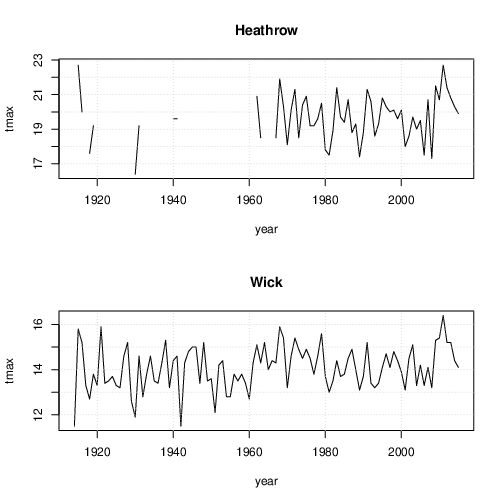

In [3]:
img = WImage(filename='Rplots.pdf')
img

Notice that the missing data is excluded from the plot for Heathrow and this is why there are disjoint line segments! We can see from these time series that there seems to be some positive correlation between maximum temperature in Heathrow and in Wick.

### Exercise 5:

Code for the mapper is included below:

In [ ]:
#!/usr/bin/env python
import sys

doneFirst = 0
count = 0
Sx = 0
Sy = 0
Sxy = 0
Sxx = 0

# input comes from STDIN (standard input)
for line in sys.stdin:

        # ignore the first line of data (the header line)
        if doneFirst == 0:
                doneFirst = 1
                continue

        # remove leading and trailing whitespace
        line = line.strip()

        # split the line by empty space
        cols = line.split('\t')

        # extract x and y from the data
        y = cols[2]
        x = cols[5]

        # convert  x, y (currently a string) to a float
        try:
                x = float(x)
                y = float(y)
        except ValueError:
                # x or y was not a float (or was missing),
                # so silently ignore/discard this line
                continue
                
        # update count, Sx, Sy, Sxy and Sxx
        count += 1
        Sx += x
        Sy += y
        Sxy += x*y
        Sxx += x*x

        # write the results to STDOUT (standard output);
        # what we output here will be the input for the
        # Reduce step, i.e. the input for reducer.py
        #
        # tab-delimited
        print '%s\t%s\t%s\t%s\t%s' % (count, Sx, Sy, Sxy, Sxx)

Code for the reducer is included below:

In [ ]:
#!/usr/bin/env python
from operator import itemgetter
import sys

tot_count = 0
tot_Sx = 0
tot_Sy = 0
tot_Sxy = 0
tot_Sxx = 0

# input comes from STDIN
for line in sys.stdin:
        # remove leading and trailing whitespace
        line = line.strip()

        # parse the input we got from mapper.py
        count, Sx, Sy, Sxy, Sxx = line.split()

        # convert count, Sx, Sy, Sxy, Sxx to float
        try:
                count = float(count)
                Sx = float(Sx)
                Sy = float(Sy)
                Sxy = float(Sxy)
                Sxx = float(Sxx)
        except ValueError:
                # at least one of count, Sx, Sy, Sxy
                # , Sxx  was not a float, so
                # silently ignore/discard this line
                continue

        # update total values
        tot_count += count
        tot_Sx += Sx
        tot_Sy += Sy
        tot_Sxy += Sxy
        tot_Sxx += Sxx

# compute determinant of matrix
det = (tot_count*tot_Sxx) - (tot_Sx*tot_Sx)

# compute intercept and gradient by solving the linear system
intercept = (tot_Sxx*tot_Sy) - (tot_Sx*tot_Sxy)
intercept /= det
gradient = (-tot_Sx*tot_Sy) + (tot_count*tot_Sxy)
gradient /= det

# write result to STDOUT
print '%s\t%s' %(intercept, gradient)

Command to execute the Hadoop job (note: USER must be replaced with your username):    

In [ ]:
hadoop jar $HADOOP_STR/hadoop-streaming-2.7.0-mapr-1808.jar \
-libjars $HADOOP_STR/hadoop-streaming-2.7.0-mapr-1808.jar \
-input w2e3-output/part-00000 \
-output w2e5-output \
-mapper "python mapper.py" \
-file /home/USER/bd-sp-2017/w2e5/mapper.py \
-reducer "python reducer.py" \
-file /home/USER/bd-sp-2017/w2e5/reducer.py

We now load the results from HDFS locally and save it as output.txt via the command:

In [ ]:
hadoop fs -get w2e5-output/part* output.txt

Printing out the results with cat utility we obtain:

-1.00785740023	1.48965267536

So the intercept is around -1.0 and the gradient is around 1.5 (this is positive as expected from the plots of the two time series).